<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/MLweek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df =pd.read_csv("/content/drive/MyDrive/ML/titanic_test.csv")

df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
print(df.head())
print(df.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
(418, 11)


In [10]:
from sklearn.model_selection import train_test_split
na_values=df.isna()
print(na_values)

     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     Fa

In [5]:
df.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [14]:
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('Cabin',axis=1),
    df['Cabin'],
    test_size=0.2,random_state=42
)

In [16]:
constant_features =[col for col in x_train.columns if x_train[col].nunique()==1]
print(len(constant_features))

0


In [20]:
quasi_constant_features=[]
for col in x_train.columns:
  top_freq=x_train[col].value_counts(normalize=True).values[0]
  if top_freq>0.5:
    quasi_constant_features.append(col)
print(quasi_constant_features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [24]:
corr_matrix = x_train.select_dtypes(include=['number']).corr()
# Pairs with high correlation
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


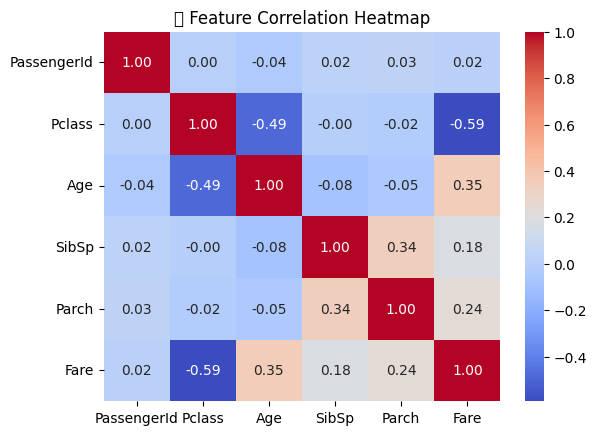

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔶 Feature Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split


variables = ['Pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']
data = pd.read_csv(
    "/content/drive/MyDrive/ML/titanic_train.csv",
    usecols=variables,
    na_values='?',
    )
data.dropna(subset=['embarked'], inplace=True)
data.head()
